In [1]:
import sqlite3
import psycopg2
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect(r"C:\Users\Richi\OneDrive\Desktop\Bootcamp\Tableau\sqlite-sakila.db") 
cur = con.cursor()

In [3]:
film = pd.read_sql_query(''' select f.title,
(a.first_name || ' ' ||a.last_name) as actor_name,
f.rating,
c.name as category,
f.description,
f.release_year,
f."length",
f.rental_duration,
f.rental_rate,
f.special_features,
l.name as film_language,
i.inventory_id
FROM film f
left join film_actor fa on fa.film_id = f.film_id
left join actor a on a.actor_id = fa.actor_id
left join "language" l on l.language_id = f.language_id 
left JOIN inventory i on i.film_id = f.film_id 
left join film_category fc on fc.film_id = f.film_id 
LEFT join category c on c.category_id = fc.category_id    ''',con)
con.close

<function Connection.close>

In [4]:
film

,title,actor_name,rating,category,description,release_year,length,rental_duration,rental_rate,special_features,film_language,inventory_id
0,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,1.0
1,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,2.0
2,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,3.0
3,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,4.0
4,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25367,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4577.0
25368,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4578.0
25369,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4579.0
25370,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4580.0


In [5]:
customer =  pd.read_sql_query('''SELECT c.customer_id,
(c.first_name || ' '|| c.last_name) as customer_name,
c.active,
r.rental_date,
r.return_date,
p.amount,
p.payment_date,
s.store_id,
(s2.first_name || ' '|| s2.last_name) as staff_name,
a.address,
c2.city,
c3.country,
i.inventory_id,
f.title as film_title
from customer c
left join rental r on r.customer_id = c.customer_id 
LEFT join payment p on p.rental_id = r.rental_id 
left JOIN store s on s.store_id = c.store_id 
left JOIN staff s2 on s2.store_id = s.store_id 
left join address a on a.address_id = s2.address_id 
left join city c2 on c2.city_id = a.city_id 
left join country c3 on c3.country_id = c2.country_id 
left JOIN inventory i on i.inventory_id = r.inventory_id 
left JOIN film f on f.film_id = i.film_id  ''',con)
con.close

<function Connection.close>

In [6]:
customer

,customer_id,customer_name,active,rental_date,return_date,amount,payment_date,store_id,staff_name,address,city,country,inventory_id,film_title
0,1,MARY SMITH,1,2005-05-25 11:30:37.000,2005-06-03 12:00:37.000,2.99,2005-05-25 11:30:37.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,3021,PATIENT SISTER
1,1,MARY SMITH,1,2005-05-28 10:35:23.000,2005-06-03 06:32:23.000,0.99,2005-05-28 10:35:23.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,4020,TALENTED HOMICIDE
2,1,MARY SMITH,1,2005-06-15 00:54:12.000,2005-06-23 02:42:12.000,5.99,2005-06-15 00:54:12.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,2785,MUSKETEERS WAIT
3,1,MARY SMITH,1,2005-06-15 18:02:53.000,2005-06-19 15:54:53.000,0.99,2005-06-15 18:02:53.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,1021,DETECTIVE VISION
4,1,MARY SMITH,1,2005-06-15 21:08:46.000,2005-06-25 02:26:46.000,9.99,2005-06-15 21:08:46.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,1407,FERRIS MOTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,599,AUSTIN CINTRON,1,2005-08-21 17:43:42.000,2005-08-22 18:53:42.000,4.99,2005-08-21 17:43:42.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,4575,ZORRO ARK
16040,599,AUSTIN CINTRON,1,2005-08-21 21:41:57.000,2005-08-25 20:37:57.000,1.99,2005-08-21 21:41:57.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,4091,TIMBERLAND SKY
16041,599,AUSTIN CINTRON,1,2005-08-23 06:09:44.000,2005-09-01 06:53:44.000,8.99,2005-08-23 06:09:44.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,4048,TEMPLE ATTRACTION
16042,599,AUSTIN CINTRON,1,2005-08-23 11:08:46.000,2005-08-25 07:25:46.000,2.99,2005-08-23 11:08:46.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,3990,SUSPECTS QUILLS


In [7]:
#copy of dataframe
filmcopy = film 

In [8]:
#copy of dataframe
customercopy = customer

In [9]:
film.head(10)

,title,actor_name,rating,category,description,release_year,length,rental_duration,rental_rate,special_features,film_language,inventory_id
0,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,1.0
1,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,2.0
2,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,3.0
3,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,4.0
4,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,5.0
5,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,6.0
6,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,7.0
7,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,8.0
8,ACADEMY DINOSAUR,CHRISTIAN GABLE,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,1.0
9,ACADEMY DINOSAUR,CHRISTIAN GABLE,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,2.0


In [10]:
customer.head(10)

,customer_id,customer_name,active,rental_date,return_date,amount,payment_date,store_id,staff_name,address,city,country,inventory_id,film_title
0,1,MARY SMITH,1,2005-05-25 11:30:37.000,2005-06-03 12:00:37.000,2.99,2005-05-25 11:30:37.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,3021,PATIENT SISTER
1,1,MARY SMITH,1,2005-05-28 10:35:23.000,2005-06-03 06:32:23.000,0.99,2005-05-28 10:35:23.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,4020,TALENTED HOMICIDE
2,1,MARY SMITH,1,2005-06-15 00:54:12.000,2005-06-23 02:42:12.000,5.99,2005-06-15 00:54:12.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,2785,MUSKETEERS WAIT
3,1,MARY SMITH,1,2005-06-15 18:02:53.000,2005-06-19 15:54:53.000,0.99,2005-06-15 18:02:53.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,1021,DETECTIVE VISION
4,1,MARY SMITH,1,2005-06-15 21:08:46.000,2005-06-25 02:26:46.000,9.99,2005-06-15 21:08:46.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,1407,FERRIS MOTHER
5,1,MARY SMITH,1,2005-06-16 15:18:57.000,2005-06-17 21:05:57.000,4.99,2005-06-16 15:18:57.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,726,CLOSER BANG
6,1,MARY SMITH,1,2005-06-18 08:41:48.000,2005-06-22 03:36:48.000,4.99,2005-06-18 08:41:48.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,197,ATTACKS HATE
7,1,MARY SMITH,1,2005-06-18 13:33:59.000,2005-06-19 17:40:59.000,0.99,2005-06-18 13:33:59.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,3497,SAVANNAH TOWN
8,1,MARY SMITH,1,2005-06-21 06:24:45.000,2005-06-28 03:28:45.000,3.99,2005-06-21 06:24:45.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,4566,YOUTH KICK
9,1,MARY SMITH,1,2005-07-08 03:17:05.000,2005-07-14 01:19:05.000,5.99,2005-07-08 03:17:05.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,1443,FIRE WOLVES


In [11]:
film.tail(10)

,title,actor_name,rating,category,description,release_year,length,rental_duration,rental_rate,special_features,film_language,inventory_id
25362,ZORRO ARK,NICK DEGENERES,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4580.0
25363,ZORRO ARK,NICK DEGENERES,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4581.0
25364,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4574.0
25365,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4575.0
25366,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4576.0
25367,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4577.0
25368,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4578.0
25369,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4579.0
25370,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4580.0
25371,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4581.0


In [12]:
customer.tail(10)

,customer_id,customer_name,active,rental_date,return_date,amount,payment_date,store_id,staff_name,address,city,country,inventory_id,film_title
16034,599,AUSTIN CINTRON,1,2005-07-30 03:52:37.000,2005-08-05 01:28:37.000,6.99,2005-07-30 03:52:37.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,2419,LOLA AGENT
16035,599,AUSTIN CINTRON,1,2005-07-31 04:57:07.000,2005-08-07 10:55:07.000,2.99,2005-07-31 04:57:07.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,2008,HOUSE DYNAMITE
16036,599,AUSTIN CINTRON,1,2005-07-31 06:41:19.000,2005-08-02 07:23:19.000,2.99,2005-07-31 06:41:19.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,3819,SQUAD FISH
16037,599,AUSTIN CINTRON,1,2005-08-17 00:05:05.000,2005-08-24 04:56:05.000,3.99,2005-08-17 00:05:05.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,2033,HURRICANE AFFAIR
16038,599,AUSTIN CINTRON,1,2005-08-21 05:07:08.000,2005-08-28 03:20:08.000,1.99,2005-08-21 05:07:08.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,2943,OUTBREAK DIVINE
16039,599,AUSTIN CINTRON,1,2005-08-21 17:43:42.000,2005-08-22 18:53:42.000,4.99,2005-08-21 17:43:42.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,4575,ZORRO ARK
16040,599,AUSTIN CINTRON,1,2005-08-21 21:41:57.000,2005-08-25 20:37:57.000,1.99,2005-08-21 21:41:57.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,4091,TIMBERLAND SKY
16041,599,AUSTIN CINTRON,1,2005-08-23 06:09:44.000,2005-09-01 06:53:44.000,8.99,2005-08-23 06:09:44.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,4048,TEMPLE ATTRACTION
16042,599,AUSTIN CINTRON,1,2005-08-23 11:08:46.000,2005-08-25 07:25:46.000,2.99,2005-08-23 11:08:46.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,3990,SUSPECTS QUILLS
16043,599,AUSTIN CINTRON,1,2005-08-23 11:25:00.000,2005-08-26 11:46:00.000,2.99,2005-08-23 11:25:00.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,378,BLUES INSTINCT


In [13]:
film.columns.tolist()

['title',
 'actor_name',
 'rating',
 'category',
 'description',
 'release_year',
 'length',
 'rental_duration',
 'rental_rate',
 'special_features',
 'film_language',
 'inventory_id']

In [14]:
customer.columns.tolist()

['customer_id',
 'customer_name',
 'active',
 'rental_date',
 'return_date',
 'amount',
 'payment_date',
 'store_id',
 'staff_name',
 'address',
 'city',
 'country',
 'inventory_id',
 'film_title']

In [15]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25372 entries, 0 to 25371
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             25372 non-null  object 
 1   actor_name        25359 non-null  object 
 2   rating            25372 non-null  object 
 3   category          25372 non-null  object 
 4   description       25372 non-null  object 
 5   release_year      25372 non-null  object 
 6   length            25372 non-null  int64  
 7   rental_duration   25372 non-null  int64  
 8   rental_rate       25372 non-null  float64
 9   special_features  25372 non-null  object 
 10  film_language     25372 non-null  object 
 11  inventory_id      25156 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.3+ MB


In [16]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    16044 non-null  int64  
 1   customer_name  16044 non-null  object 
 2   active         16044 non-null  object 
 3   rental_date    16044 non-null  object 
 4   return_date    15861 non-null  object 
 5   amount         16044 non-null  float64
 6   payment_date   16044 non-null  object 
 7   store_id       16044 non-null  int64  
 8   staff_name     16044 non-null  object 
 9   address        16044 non-null  object 
 10  city           16044 non-null  object 
 11  country        16044 non-null  object 
 12  inventory_id   16044 non-null  int64  
 13  film_title     16044 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.7+ MB


In [17]:
film.describe()

,length,rental_duration,rental_rate,inventory_id
count,25372.000000,25372.000000,25372.000000,25156.000000
mean,115.126044,4.914985,2.927254,2292.398235
std,40.422306,1.387564,1.633043,1323.523154
min,46.000000,3.000000,0.990000,1.000000
25%,80.000000,4.000000,0.990000,1147.000000
50%,114.000000,5.000000,2.990000,2285.000000
75%,150.000000,6.000000,4.990000,3433.000000
max,185.000000,7.000000,4.990000,4581.000000


In [18]:
customer.describe()

,customer_id,amount,store_id,inventory_id
count,16044.000000,16044.000000,16044.000000,16044.000000
mean,297.143169,4.201356,1.454812,2291.842558
std,172.453136,2.362961,0.497969,1322.210643
min,1.000000,0.000000,1.000000,1.000000
25%,148.000000,2.990000,1.000000,1154.000000
50%,296.000000,3.990000,1.000000,2291.000000
75%,446.000000,4.990000,2.000000,3433.000000
max,599.000000,11.990000,2.000000,4581.000000


In [19]:
film.isnull().sum()

title                 0
actor_name           13
rating                0
category              0
description           0
release_year          0
length                0
rental_duration       0
rental_rate           0
special_features      0
film_language         0
inventory_id        216
dtype: int64

In [20]:
customer.isnull().sum()

customer_id        0
customer_name      0
active             0
rental_date        0
return_date      183
amount             0
payment_date       0
store_id           0
staff_name         0
address            0
city               0
country            0
inventory_id       0
film_title         0
dtype: int64

i.	Pass the total rental payments or sales per sales associate and return a value of “Above Average”, “Average”, “Below Average”, or “No Sales”

In [21]:
def amountcat(amount):
    if amount >= 7.99:
        return 'Above Average'
    elif amount >=3.99:
        return 'Average'
    elif amount >= 0.99:
        return 'Below Average'
    else:
        return 'No Sales'

In [22]:
customer['amountcategory'] = customer['amount'].apply(amountcat)

In [23]:
customer

,customer_id,customer_name,active,rental_date,return_date,amount,payment_date,store_id,staff_name,address,city,country,inventory_id,film_title,amountcategory
0,1,MARY SMITH,1,2005-05-25 11:30:37.000,2005-06-03 12:00:37.000,2.99,2005-05-25 11:30:37.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,3021,PATIENT SISTER,Below Average
1,1,MARY SMITH,1,2005-05-28 10:35:23.000,2005-06-03 06:32:23.000,0.99,2005-05-28 10:35:23.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,4020,TALENTED HOMICIDE,Below Average
2,1,MARY SMITH,1,2005-06-15 00:54:12.000,2005-06-23 02:42:12.000,5.99,2005-06-15 00:54:12.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,2785,MUSKETEERS WAIT,Average
3,1,MARY SMITH,1,2005-06-15 18:02:53.000,2005-06-19 15:54:53.000,0.99,2005-06-15 18:02:53.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,1021,DETECTIVE VISION,Below Average
4,1,MARY SMITH,1,2005-06-15 21:08:46.000,2005-06-25 02:26:46.000,9.99,2005-06-15 21:08:46.000,1,Mike Hillyer,23 Workhaven Lane,Lethbridge,Canada,1407,FERRIS MOTHER,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,599,AUSTIN CINTRON,1,2005-08-21 17:43:42.000,2005-08-22 18:53:42.000,4.99,2005-08-21 17:43:42.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,4575,ZORRO ARK,Average
16040,599,AUSTIN CINTRON,1,2005-08-21 21:41:57.000,2005-08-25 20:37:57.000,1.99,2005-08-21 21:41:57.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,4091,TIMBERLAND SKY,Below Average
16041,599,AUSTIN CINTRON,1,2005-08-23 06:09:44.000,2005-09-01 06:53:44.000,8.99,2005-08-23 06:09:44.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,4048,TEMPLE ATTRACTION,Above Average
16042,599,AUSTIN CINTRON,1,2005-08-23 11:08:46.000,2005-08-25 07:25:46.000,2.99,2005-08-23 11:08:46.000,2,Jon Stephens,1411 Lillydale Drive,Woodridge,Australia,3990,SUSPECTS QUILLS,Below Average


Recommended to children function

In [24]:
def rating(rating):
    if rating >= 'PG-13':
        return 'Yes,with parent'
    elif rating >= 'PG' :
        return 'Yes'
    elif rating >= 'NC-17':
        return 'No'
    elif rating >= 'R':
        return 'No'
    elif rating >= 'G':
        return 'Yes'

In [25]:
film['Recommnededtokids'] = film['rating'].apply(rating)
film

,title,actor_name,rating,category,description,release_year,length,rental_duration,rental_rate,special_features,film_language,inventory_id,Recommnededtokids
0,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,1.0,Yes
1,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,2.0,Yes
2,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,3.0,Yes
3,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,4.0,Yes
4,ACADEMY DINOSAUR,PENELOPE GUINESS,PG,Documentary,A Epic Drama of a Feminist And a Mad Scientist...,2006,86,6,0.99,"Deleted Scenes,Behind the Scenes",English,5.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25367,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4577.0,No
25368,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4578.0,No
25369,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4579.0,No
25370,ZORRO ARK,LISA MONROE,NC-17,Comedy,A Intrepid Panorama of a Mad Scientist And a B...,2006,50,3,4.99,"Trailers,Commentaries,Behind the Scenes",English,4580.0,No


In [26]:
film.to_csv('film_rental_analysis.csv')

In [27]:
customer.to_csv('customer_rental_analysis.csv')

In [32]:
avgrprice = pd.DataFrame(film.groupby(['title'])['rental_rate'].mean())
avgrprice

,rental_rate
title,
ACADEMY DINOSAUR,0.99
ACE GOLDFINGER,4.99
ADAPTATION HOLES,2.99
AFFAIR PREJUDICE,2.99
AFRICAN EGG,2.99
...,...
YOUNG LANGUAGE,0.99
YOUTH KICK,0.99
ZHIVAGO CORE,0.99


Which movie category has the most/least rentals?
sports-2040
music-1257

In [33]:
film['category'].value_counts(ascending=False)

Sports         2040
Animation      1912
Action         1769
Documentary    1759
Drama          1678
Foreign        1675
Sci-Fi         1633
Family         1593
Children       1573
New            1521
Classics       1481
Horror         1469
Travel         1369
Comedy         1331
Games          1312
Music          1257
Name: category, dtype: int64

What is the most popular movie rating?
PG-13-5482

In [34]:
a=film['rating'].value_counts(ascending=False)
a

PG-13    5482
PG       5431
NC-17    5101
R        4909
G        4449
Name: rating, dtype: int64

In [35]:
rentalsum =film.groupby(['actor_name','title','rating','release_year','film_language','rental_rate']).aggregate({'rental_rate':'sum'})
rentalsum

rental_rate
actor_name title                 rating release_year film_language rental_rate             
ADAM GRANT ANNIE IDENTITY        G      2006         English       0.99                4.95
           BALLROOM MOCKINGBIRD  G      2006         English       0.99                1.98
           DISCIPLE MOTHER       PG     2006         English       0.99                5.94
           FIREBALL PHILADELPHIA PG     2006         English       0.99                6.93
           GLADIATOR WESTWARD    PG     2006         English       4.99                4.99
...                                                                                     ...
ZERO CAGE  TOOTSIE PILOT         PG     2006         English       0.99                3.96
           UPTOWN YOUNG          PG     2006         English       2.99                8.97
           VELVET TERMINATOR     R      2006         English       4.99               29.94
           WEST LION             G      2006         English       4.99               19.96
           WORKER TARZAN         R      2006         English       2.99               14.95

[5462 rows x 1 columns]

In [36]:
film.groupby(['actor_name','title','rental_rate']).aggregate({'rental_rate':'count','rental_rate':'sum'})

rental_rate
actor_name title                 rental_rate             
ADAM GRANT ANNIE IDENTITY        0.99                4.95
           BALLROOM MOCKINGBIRD  0.99                1.98
           DISCIPLE MOTHER       0.99                5.94
           FIREBALL PHILADELPHIA 0.99                6.93
           GLADIATOR WESTWARD    4.99                4.99
...                                                   ...
ZERO CAGE  TOOTSIE PILOT         0.99                3.96
           UPTOWN YOUNG          2.99                8.97
           VELVET TERMINATOR     4.99               29.94
           WEST LION             4.99               19.96
           WORKER TARZAN         2.99               14.95

[5462 rows x 1 columns]

In [37]:
b = film.groupby(['actor_name']).aggregate({'rental_rate':'sum'})
b

,rental_rate
actor_name,
ADAM GRANT,210.17
ADAM HOPPER,286.94
AL GARLAND,297.83
ALAN DREYFUSS,352.70
ALBERT JOHANSSON,470.46
...,...
WILL WILSON,413.63
WILLIAM HACKMAN,359.83
WOODY HOFFMAN,467.41


How much does a customer spend on movie rentals?

In [38]:
customer.groupby(['customer_name']).aggregate({'amount':'sum'})

,amount
customer_name,
AARON SELBY,110.76
ADAM GOOCH,101.78
ADRIAN CLARY,74.81
AGNES BISHOP,98.77
ALAN KAHN,124.74
...,...
WILLIE MARKHAM,101.75
WILMA RICHARDS,91.80
YOLANDA WEAVER,110.73


What languages are people renting the movies in?

In [39]:
film['film_language'].value_counts(ascending=False)

English    25372
Name: film_language, dtype: int64

In [ ]:
Amount made per staff member

In [40]:
staff= customer.groupby(['staff_name']).aggregate({'amount':'sum'})
staff

,amount
staff_name,
Jon Stephens,30409.03
Mike Hillyer,36997.53


Charts

Text(0.5, 1.0, 'Movie Ratings')

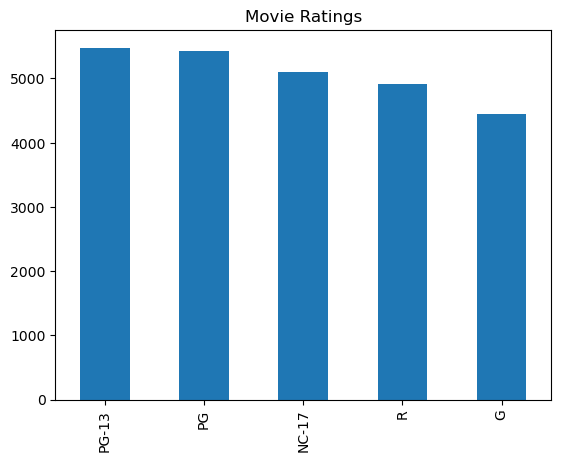

In [41]:
a.plot.bar()
plt.title('Movie Ratings')

Text(0.5, 1.0, 'Amount per Staff Member')

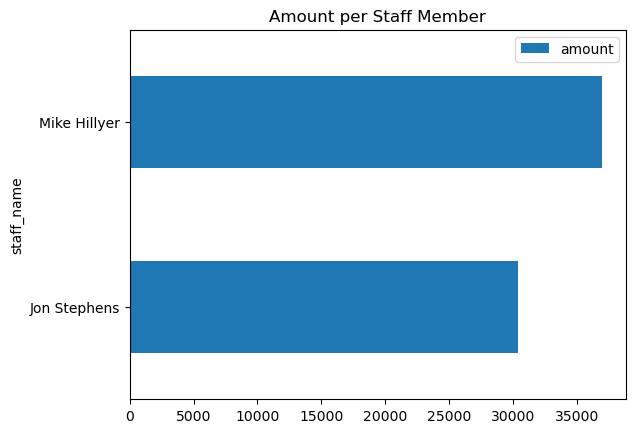

In [42]:
staff.plot.barh()
plt.title('Amount per Staff Member')